# Matthew Pronyshyn 1002365978

# Part 1

# Part 2
## Question 1

Text(0.5, 1.0, 'Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)')

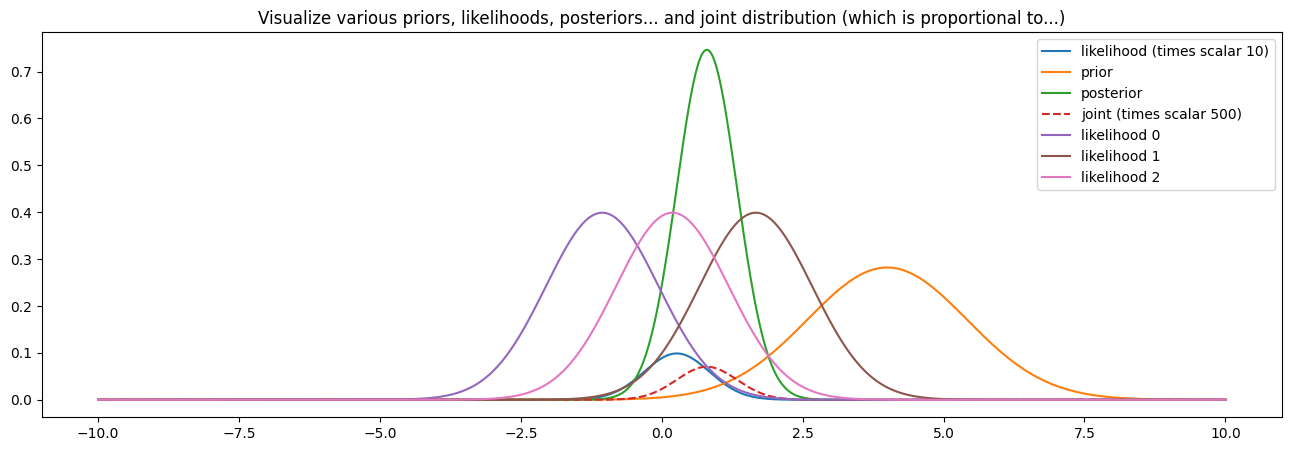

In [138]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
likelihoods = np.zeros((n, len(parameter_domain)))
for xi in range(n): 
    likelihoods[xi] = stats.norm.pdf((x[xi])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10; 
joint = c*likelihood*prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*likelihood, label="likelihood (times scalar "+str(c2)+")"); plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior"); plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.plot(parameter_domain, likelihoods[0], label="likelihood 0")
plt.plot(parameter_domain, likelihoods[1], label="likelihood 1")
plt.plot(parameter_domain, likelihoods[2], label="likelihood 2")
plt.legend(); plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")


## Question 2

Text(0.5, 1.0, 'Visualize various log-priors, log-likelihoods, log-posteriors... and joint distribution (which is proportional to...)')

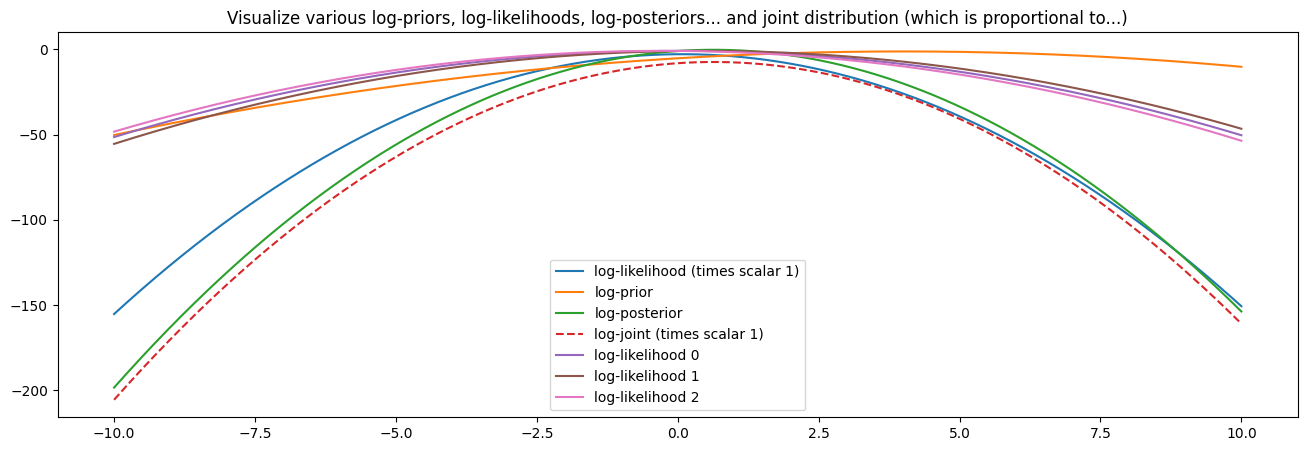

In [154]:
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 
likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0) # sigma=1 known
likelihoods = np.zeros((n, len(parameter_domain)))
for xi in range(n): 
    likelihoods[xi] = stats.norm.logpdf((x[xi])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 1,1; 
joint = likelihood+prior # elementwise multiplication 
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*likelihood, label="log-likelihood (times scalar "+str(c2)+")"); plt.plot(parameter_domain, prior, label="log-prior"); plt.plot(parameter_domain, posterior, label="log-posterior"); plt.plot(parameter_domain, joint, linestyle="--", label="log-joint (times scalar "+str(c)+")")
plt.plot(parameter_domain, likelihoods[0], label="log-likelihood 0")
plt.plot(parameter_domain, likelihoods[1], label="log-likelihood 1")
plt.plot(parameter_domain, likelihoods[2], label="log-likelihood 2")
plt.legend(); plt.title("Visualize various log-priors, log-likelihoods, log-posteriors... and joint distribution (which is proportional to...)")

## Question 3

The posterior distribution $p(\theta∣x)$ is proportional to the product of the likelihood and the prior. In this case, with a flat prior, the posterior is directly proportional to the likelihood. For a normal likelihood, the posterior distribution in the presence of a flat prior is still a proper normal distribution.

## Question 4

When using an improper prior proportional to 1, the relationship between the log likelihood and the log posterior is given by the equation:

\begin{align*}
\log(p(\theta|x)) &= \log\left(\frac{p(x|\theta)p(\theta)}{p(x)}\right)\\
\log(p(\theta|x)) &\propto \log(p(x|\theta)) - \log(p(x))
\end{align*}

Therefore the difference between the log likelihood and the log posterior is the log of the marginal likelihood.